In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import numpy as np
import seaborn as sns

# For PCA and tSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_data = pd.read_csv('./inputs/train.csv')
test_data = pd.read_csv('./inputs/test.csv')

In [82]:
df_train = pd.DataFrame(train_data)
columns_to_drop = ["tBodyAcc-sma()","tBodyAcc-iqr()-X","tBodyAcc-iqr()-Y","tBodyAcc-iqr()-Z",
                   "tBodyAcc-entropy()-X","tBodyAcc-entropy()-Y","tBodyAcc-entropy()-Z",
                   "tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",
                   "tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4",
                   "tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4",
                   "tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",
                   "tBodyGyroJerkMag-sma()","tBodyGyroJerkMag-energy()","tBodyGyroJerkMag-iqr()","tBodyGyroJerkMag-entropy()",
                   "tBodyGyroJerkMag-arCoeff()1","tBodyGyroJerkMag-arCoeff()2","tBodyGyroJerkMag-arCoeff()3","tBodyGyroJerkMag-arCoeff()4",
                   'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()','tBodyGyroJerkMag-mad()', 'tBodyGyroJerkMag-max()','tBodyGyroJerkMag-min()',
                   'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()',
                   'tBodyGyroMag-max()', 'tBodyGyroMag-min()', 'tBodyGyroMag-sma()',
                   'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'tBodyGyroMag-entropy()',
                   'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2',
                   'tBodyGyroMag-arCoeff()3', 'tBodyGyroMag-arCoeff()4',
                   'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()',
                   'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()',
                   'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()',
                   'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()',
                   'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoeff()1',
                   'tBodyAccJerkMag-arCoeff()2', 'tBodyAccJerkMag-arCoeff()3',
                   'tBodyAccJerkMag-arCoeff()4',
                   'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()',
                   'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()',
                   'tGravityAccMag-energy()', 'tGravityAccMag-iqr()',
                   'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1',
                   'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3',
                   'tGravityAccMag-arCoeff()4',
                   
                   "fBodyAcc-mean()-X","fBodyAcc-mean()-Y","fBodyAcc-mean()-Z","fBodyAcc-std()-X","fBodyAcc-std()-Y","fBodyAcc-std()-Z",
                   "fBodyAcc-mad()-X","fBodyAcc-mad()-Y","fBodyAcc-mad()-Z","fBodyAcc-max()-X","fBodyAcc-max()-Y","fBodyAcc-max()-Z",
                   "fBodyAcc-min()-X","fBodyAcc-min()-Y","fBodyAcc-min()-Z","fBodyAcc-sma()",
                   "fBodyAcc-energy()-X","fBodyAcc-energy()-Y","fBodyAcc-energy()-Z",
                   "fBodyAcc-iqr()-X","fBodyAcc-iqr()-Y","fBodyAcc-iqr()-Z",
                   "fBodyAcc-entropy()-X","fBodyAcc-entropy()-Y","fBodyAcc-entropy()-Z",
                   "fBodyAcc-maxInds-X","fBodyAcc-maxInds-Y","fBodyAcc-maxInds-Z",
                   "fBodyAcc-meanFreq()-X","fBodyAcc-meanFreq()-Y","fBodyAcc-meanFreq()-Z",
                   "fBodyAcc-skewness()-X",
                   "fBodyAcc-kurtosis()-X",
                   "fBodyAcc-skewness()-Y",
                   "fBodyAcc-kurtosis()-Y",
                   "fBodyAcc-skewness()-Z",
                   "fBodyAcc-kurtosis()-Z",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16",
                   "fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48",
                   "fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32",
                   "fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-9,16","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-25,32",
                   "fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-57,64",
                   "fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-49,64",
                   "fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-25,48",
                   "fBodyAccJerk-mean()-X","fBodyAccJerk-mean()-Y","fBodyAccJerk-mean()-Z",
                   "fBodyAccJerk-std()-X","fBodyAccJerk-std()-Y","fBodyAccJerk-std()-Z",
                   "fBodyAccJerk-mad()-X","fBodyAccJerk-mad()-Y","fBodyAccJerk-mad()-Z",
                   "fBodyAccJerk-max()-X","fBodyAccJerk-max()-Y","fBodyAccJerk-max()-Z",
                   "fBodyAccJerk-min()-X","fBodyAccJerk-min()-Y","fBodyAccJerk-min()-Z",
                   "fBodyAccJerk-sma()",
                   "fBodyAccJerk-energy()-X","fBodyAccJerk-energy()-Y","fBodyAccJerk-energy()-Z",
                   "fBodyAccJerk-iqr()-X","fBodyAccJerk-iqr()-Y","fBodyAccJerk-iqr()-Z",
                   "fBodyAccJerk-entropy()-X","fBodyAccJerk-entropy()-Y","fBodyAccJerk-entropy()-Z",
                   "fBodyAccJerk-maxInds-X","fBodyAccJerk-maxInds-Y","fBodyAccJerk-maxInds-Z",
                   "fBodyAccJerk-meanFreq()-X","fBodyAccJerk-meanFreq()-Y","fBodyAccJerk-meanFreq()-Z",
                   "fBodyAccJerk-skewness()-X",
                   "fBodyAccJerk-kurtosis()-X",
                   "fBodyAccJerk-skewness()-Y",
                   "fBodyAccJerk-kurtosis()-Y",
                   "fBodyAccJerk-skewness()-Z",
                   "fBodyAccJerk-kurtosis()-Z",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16",
                   "fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32","fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48",
                   "fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64","fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32",
                   "fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-17,24","fBodyAccJerk-bandsEnergy()-25,32",
                   "fBodyAccJerk-bandsEnergy()-33,40","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-49,56","fBodyAccJerk-bandsEnergy()-57,64",
                   "fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-33,48","fBodyAccJerk-bandsEnergy()-49,64",
                   "fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-25,48",
                   "fBodyGyro-mean()-X","fBodyGyro-mean()-Y","fBodyGyro-mean()-Z",
                   "fBodyGyro-std()-X","fBodyGyro-std()-Y","fBodyGyro-std()-Z",
                   "fBodyGyro-mad()-X","fBodyGyro-mad()-Y","fBodyGyro-mad()-Z",
                   "fBodyGyro-max()-X","fBodyGyro-max()-Y","fBodyGyro-max()-Z",
                   "fBodyGyro-min()-X","fBodyGyro-min()-Y","fBodyGyro-min()-Z",
                   "fBodyGyro-sma()",
                   "fBodyGyro-energy()-X","fBodyGyro-energy()-Y","fBodyGyro-energy()-Z",
                   "fBodyGyro-iqr()-X","fBodyGyro-iqr()-Y","fBodyGyro-iqr()-Z",
                   "fBodyGyro-entropy()-X","fBodyGyro-entropy()-Y","fBodyGyro-entropy()-Z",
                   "fBodyGyro-maxInds-X","fBodyGyro-maxInds-Y","fBodyGyro-maxInds-Z",
                   "fBodyGyro-meanFreq()-X","fBodyGyro-meanFreq()-Y","fBodyGyro-meanFreq()-Z",
                   "fBodyGyro-skewness()-X",
                   "fBodyGyro-kurtosis()-X",
                   "fBodyGyro-skewness()-Y",
                   "fBodyGyro-kurtosis()-Y",
                   "fBodyGyro-skewness()-Z", 
                   "fBodyGyro-kurtosis()-Z",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48","fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16",
                   "fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32","fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48",
                   "fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64","fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32",
                   "fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64","fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyGyro-bandsEnergy()-1,8","fBodyGyro-bandsEnergy()-9,16","fBodyGyro-bandsEnergy()-17,24","fBodyGyro-bandsEnergy()-25,32",
                   "fBodyGyro-bandsEnergy()-33,40","fBodyGyro-bandsEnergy()-41,48","fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-57,64",
                   "fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-17,32","fBodyGyro-bandsEnergy()-33,48","fBodyGyro-bandsEnergy()-49,64",
                   "fBodyGyro-bandsEnergy()-1,24","fBodyGyro-bandsEnergy()-25,48",
                   "fBodyAccMag-mean()","fBodyAccMag-std()","fBodyAccMag-mad()",
                   "fBodyAccMag-max()","fBodyAccMag-min()","fBodyAccMag-sma()",
                   "fBodyAccMag-energy()","fBodyAccMag-iqr()","fBodyAccMag-entropy()",
                   "fBodyAccMag-maxInds","fBodyAccMag-meanFreq()","fBodyAccMag-skewness()",
                   "fBodyAccMag-kurtosis()",
                   "fBodyBodyAccJerkMag-mean()","fBodyBodyAccJerkMag-std()","fBodyBodyAccJerkMag-mad()","fBodyBodyAccJerkMag-max()",
                   "fBodyBodyAccJerkMag-min()","fBodyBodyAccJerkMag-sma()","fBodyBodyAccJerkMag-energy()","fBodyBodyAccJerkMag-iqr()",
                   "fBodyBodyAccJerkMag-entropy()","fBodyBodyAccJerkMag-maxInds","fBodyBodyAccJerkMag-meanFreq()",
                   "fBodyBodyAccJerkMag-skewness()","fBodyBodyAccJerkMag-kurtosis()","fBodyBodyGyroMag-mean()",
                   "fBodyBodyGyroMag-std()","fBodyBodyGyroMag-mad()","fBodyBodyGyroMag-max()","fBodyBodyGyroMag-min()",
                   "fBodyBodyGyroMag-sma()","fBodyBodyGyroMag-energy()","fBodyBodyGyroMag-iqr()","fBodyBodyGyroMag-entropy()",
                   "fBodyBodyGyroMag-maxInds","fBodyBodyGyroMag-meanFreq()","fBodyBodyGyroMag-skewness()","fBodyBodyGyroMag-kurtosis()",
                   "fBodyBodyGyroJerkMag-mean()","fBodyBodyGyroJerkMag-std()","fBodyBodyGyroJerkMag-mad()","fBodyBodyGyroJerkMag-max()",
                   "fBodyBodyGyroJerkMag-min()","fBodyBodyGyroJerkMag-sma()","fBodyBodyGyroJerkMag-energy()","fBodyBodyGyroJerkMag-iqr()",
                   "fBodyBodyGyroJerkMag-entropy()","fBodyBodyGyroJerkMag-maxInds","fBodyBodyGyroJerkMag-meanFreq()",
                   "fBodyBodyGyroJerkMag-skewness()","fBodyBodyGyroJerkMag-kurtosis()","angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)",
                   "angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",
                   "angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",
                   "fBodyGyro-bandsEnergy()-49,56.2", "fBodyGyro-bandsEnergy()-57,64.2","fBodyGyro-bandsEnergy()-1,16.2", "fBodyGyro-bandsEnergy()-17,32.2",
                   "fBodyGyro-bandsEnergy()-33,48.2",
                   "fBodyGyro-bandsEnergy()-9,16.2", "fBodyGyro-bandsEnergy()-17,24.2", "fBodyGyro-bandsEnergy()-25,32.2", "fBodyGyro-bandsEnergy()-33,40.2", "fBodyGyro-bandsEnergy()-41,48.2", 
                   "fBodyGyro-bandsEnergy()-49,64.2","fBodyGyro-bandsEnergy()-1,24.2","fBodyGyro-bandsEnergy()-25,48.2",
                   "fBodyGyro-bandsEnergy()-57,64.1", "fBodyGyro-bandsEnergy()-1,16.1", "fBodyGyro-bandsEnergy()-17,32.1", "fBodyGyro-bandsEnergy()-33,48.1", 
                   "fBodyGyro-bandsEnergy()-49,64.1", "fBodyGyro-bandsEnergy()-1,24.1", "fBodyGyro-bandsEnergy()-25,48.1", "fBodyGyro-bandsEnergy()-1,8.2",
                   "fBodyAccJerk-bandsEnergy()-25,48.2", "fBodyGyro-bandsEnergy()-1,8.1", "fBodyGyro-bandsEnergy()-9,16.1",
                   "fBodyGyro-bandsEnergy()-17,24.1", "fBodyGyro-bandsEnergy()-25,32.1", "fBodyGyro-bandsEnergy()-33,40.1", 
                   "fBodyGyro-bandsEnergy()-41,48.1", "fBodyGyro-bandsEnergy()-49,56.1",
                   "fBodyAccJerk-bandsEnergy()-41,48.2", "fBodyAccJerk-bandsEnergy()-49,56.2", "fBodyAccJerk-bandsEnergy()-57,64.2","fBodyAccJerk-bandsEnergy()-1,16.2", 
                   "fBodyAccJerk-bandsEnergy()-17,32.2", "fBodyAccJerk-bandsEnergy()-33,48.2", "fBodyAccJerk-bandsEnergy()-49,64.2", "fBodyAccJerk-bandsEnergy()-1,24.2",
                   "fBodyAccJerk-bandsEnergy()-49,64.1", "fBodyAccJerk-bandsEnergy()-1,24.1", "fBodyAccJerk-bandsEnergy()-25,48.1", "fBodyAccJerk-bandsEnergy()-1,8.2", 
                   "fBodyAccJerk-bandsEnergy()-9,16.2", "fBodyAccJerk-bandsEnergy()-17,24.2", "fBodyAccJerk-bandsEnergy()-25,32.2", "fBodyAccJerk-bandsEnergy()-33,40.2",
                   "fBodyAccJerk-bandsEnergy()-25,32.1", "fBodyAccJerk-bandsEnergy()-33,40.1", "fBodyAccJerk-bandsEnergy()-41,48.1", "fBodyAccJerk-bandsEnergy()-49,56.1", 
                   "fBodyAccJerk-bandsEnergy()-57,64.1", "fBodyAccJerk-bandsEnergy()-1,16.1", "fBodyAccJerk-bandsEnergy()-17,32.1", "fBodyAccJerk-bandsEnergy()-33,48.1",
                   "fBodyAcc-bandsEnergy()-17,32.2", "fBodyAcc-bandsEnergy()-33,48.2", "fBodyAcc-bandsEnergy()-49,64.2", "fBodyAcc-bandsEnergy()-1,24.2", 
                   "fBodyAcc-bandsEnergy()-25,48.2", "fBodyAccJerk-bandsEnergy()-1,8.1", "fBodyAccJerk-bandsEnergy()-9,16.1",
                   "fBodyAccJerk-bandsEnergy()-17,24.1",
                   'fBodyAcc-bandsEnergy()-1,8.1', 'fBodyAcc-bandsEnergy()-9,16.1',
                   'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-25,32.1',
                   'fBodyAcc-bandsEnergy()-33,40.1', 'fBodyAcc-bandsEnergy()-41,48.1',
                   'fBodyAcc-bandsEnergy()-49,56.1', 'fBodyAcc-bandsEnergy()-57,64.1',
                   'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-17,32.1',
                   'fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAcc-bandsEnergy()-49,64.1',
                   'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-25,48.1',
                   'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-9,16.2',
                   'fBodyAcc-bandsEnergy()-17,24.2', 'fBodyAcc-bandsEnergy()-25,32.2',
                   'fBodyAcc-bandsEnergy()-33,40.2', 'fBodyAcc-bandsEnergy()-41,48.2',
                   'fBodyAcc-bandsEnergy()-49,56.2', 'fBodyAcc-bandsEnergy()-57,64.2',
                   'fBodyAcc-bandsEnergy()-1,16.2'
                  ]

df_train.drop(columns_to_drop, axis = 1, inplace=True)

# tBodyGyroJerkMag tBodyGyroMag tBodyAccJerkMag tGravityAccMag
# lab = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('tGravityAccMag')]]
# lab = df_train[df_train.columns[pd.Series(df_train.columns).str.startswith('fBodyAcc-bandsEnergy()')]]
# lab.columns
# df_train.columns

In [84]:
df_test = pd.DataFrame(test_data)
df_test.drop(columns_to_drop, axis = 1, inplace=True)

In [85]:
train_is_UP =  df_train['Activity']=='WALKING_UPSTAIRS'
test_is_UP =  df_test['Activity']=='WALKING_UPSTAIRS'
train_data_UP = df_train[train_is_UP]
test_data_UP = df_test[test_is_UP]
train_data_UP

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,subject,Activity
150,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,-0.220939,...,-0.144521,-0.633638,-0.484812,0.801792,-0.253646,0.073407,0.310136,-0.278156,1,WALKING_UPSTAIRS
151,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,-0.027792,-0.319136,...,-0.180750,-0.667381,-0.526189,0.766181,-0.236703,0.085674,0.104948,-0.007789,1,WALKING_UPSTAIRS
152,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,-0.028194,-0.269518,...,-0.142458,-0.646704,-0.550487,0.792732,-0.384453,0.271378,-0.064482,-0.010898,1,WALKING_UPSTAIRS
153,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,0.027044,-0.169848,...,-0.114723,-0.608186,-0.426077,0.786688,-0.484930,0.420191,-0.283841,0.102792,1,WALKING_UPSTAIRS
154,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,0.097693,-0.169848,...,-0.113543,-0.603827,-0.403679,0.800242,-0.348737,0.315101,-0.191353,0.005036,1,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.031719,-0.501338,-0.487036,0.814509,-0.617906,0.653662,-0.803065,0.524863,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.065256,-0.539787,-0.444159,0.836935,-0.468825,0.465193,-0.723034,0.678550,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.003936,-0.492239,-0.416528,0.844283,-0.492911,0.463193,-0.671517,0.637480,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.002445,-0.496421,-0.516613,0.779385,-0.526184,0.450578,-0.478786,0.421441,30,WALKING_UPSTAIRS


In [90]:
train_is_DOWN = df_train['Activity']=='WALKING_DOWNSTAIRS'
test_is_DOWN = df_test['Activity']=='WALKING_DOWNSTAIRS'
train_data_DOWN = df_train[train_is_DOWN]
test_data_DOWN = df_test[test_is_DOWN]
test_data_DOWN

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,subject,Activity
109,0.392763,-0.059174,-0.110928,-0.148422,0.048984,-0.296346,-0.225294,0.008386,-0.286232,0.396940,...,-0.124303,-0.547641,-0.623461,0.728742,-0.293642,0.224167,0.067333,-0.203747,2,WALKING_DOWNSTAIRS
110,0.333227,-0.024943,-0.158919,-0.104144,-0.013973,-0.329714,-0.191389,-0.029694,-0.287530,0.396940,...,-0.105521,-0.539556,-0.638474,0.682028,-0.214521,0.205165,-0.064256,-0.083767,2,WALKING_DOWNSTAIRS
111,0.316154,0.001277,-0.065453,-0.151633,0.116282,-0.153958,-0.258230,0.040523,-0.174623,0.318677,...,-0.100581,-0.511191,-0.532186,0.699454,-0.187883,0.150459,-0.104701,0.120968,2,WALKING_DOWNSTAIRS
112,0.153661,-0.010078,-0.043895,-0.214278,0.132208,-0.199881,-0.357468,0.025411,-0.259067,0.318677,...,-0.149052,-0.551995,-0.635149,0.696212,-0.258227,0.174283,-0.056116,0.098218,2,WALKING_DOWNSTAIRS
113,0.071035,-0.015656,-0.094263,-0.213424,0.065907,-0.379623,-0.337972,-0.013718,-0.382558,0.301304,...,-0.157655,-0.594020,-0.601934,0.739280,-0.221930,0.210829,-0.341805,0.377746,2,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.126970,-0.013276,-0.073441,-0.173816,0.041540,-0.342513,-0.253156,-0.093578,-0.350155,0.285773,...,-0.132698,-0.572441,-0.501283,0.804178,-0.291968,0.235042,-0.349790,0.468321,24,WALKING_DOWNSTAIRS
2933,0.363943,-0.022212,-0.125437,-0.041180,0.020777,-0.243607,-0.113519,-0.120400,-0.221709,0.411506,...,-0.045708,-0.474353,-0.453913,0.780358,-0.394191,0.305301,-0.319872,0.410811,24,WALKING_DOWNSTAIRS
2934,0.331044,-0.063979,-0.117333,-0.068002,0.156431,-0.317060,-0.148922,0.070107,-0.290868,0.411506,...,-0.032979,-0.473635,-0.473142,0.810041,-0.402721,0.235238,-0.047672,0.171389,24,WALKING_DOWNSTAIRS
2935,0.272259,-0.007579,-0.072642,-0.072559,0.005472,-0.225400,-0.161118,-0.074187,-0.280956,0.402615,...,-0.048605,-0.497208,-0.416069,0.823037,-0.166491,0.085101,-0.156125,0.360960,24,WALKING_DOWNSTAIRS


In [91]:
train_is_WALKING = df_train['Activity']=='WALKING'
test_is_WALKING = df_test['Activity']=='WALKING'
train_data_WALKING = df_train[train_is_WALKING]
test_data_WALKING = df_test[test_is_WALKING]
test_data_WALKING

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,subject,Activity
79,0.203962,-0.032345,-0.096881,-0.465504,-0.180785,-0.455108,-0.497882,-0.242498,-0.458406,-0.179696,...,-0.356430,-0.783484,-0.550937,0.722880,-0.031251,0.066107,-0.261735,0.273639,2,WALKING
80,0.249343,-0.003411,-0.056042,-0.399476,-0.137845,-0.461271,-0.437246,-0.198605,-0.453340,-0.179696,...,-0.295608,-0.748264,-0.485168,0.734858,0.080634,-0.027559,-0.158627,0.173425,2,WALKING
81,0.325051,-0.029804,-0.077847,-0.465120,0.013453,-0.367646,-0.500004,-0.032380,-0.341866,-0.339242,...,-0.277559,-0.734304,-0.565845,0.752276,0.273060,-0.127122,-0.067149,-0.074157,2,WALKING
82,0.308808,-0.022128,-0.132104,-0.514826,0.032009,-0.349003,-0.553718,-0.000161,-0.312035,-0.392279,...,-0.291286,-0.747099,-0.642021,0.693943,0.192464,-0.041571,-0.248504,0.121837,2,WALKING
83,0.265599,-0.015936,-0.120750,-0.500950,-0.163230,-0.389428,-0.537218,-0.159272,-0.367618,-0.302921,...,-0.343938,-0.786321,-0.596545,0.701562,0.056844,-0.031827,-0.222023,0.322692,2,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,-0.300780,-0.760597,-0.639880,0.682496,-0.169589,0.159046,-0.123930,0.016433,24,WALKING
2885,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.328001,-0.770301,-0.663009,0.699429,-0.083903,0.129510,-0.170542,0.030205,24,WALKING
2886,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.412215,-0.815688,-0.676418,0.631963,-0.117568,0.132474,-0.109778,-0.003312,24,WALKING
2887,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.402012,-0.812115,-0.678058,0.692574,-0.122038,0.043825,0.055390,-0.005972,24,WALKING


In [92]:
# combine both test and train data
full_data_DOWN = pd.concat([train_data_DOWN, test_data_DOWN], axis=0).reset_index(drop=True)
full_data_UP = pd.concat([train_data_UP, test_data_UP], axis=0).reset_index(drop=True)
full_data_WALKING = pd.concat([train_data_WALKING, test_data_WALKING], axis=0).reset_index(drop=True)
full_data = pd.concat([full_data_DOWN, full_data_UP, full_data_WALKING], axis = 0).reset_index(drop=True)
# Look at the shape of dataframes
print('Shape Train: {}'.format(full_data.shape))
print('Shape Test: {}\n'.format(full_data.shape))
full_data

Shape Train: (4672, 193)
Shape Test: (4672, 193)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.170441,-0.625680,-0.381499,0.837681,-0.107066,0.140391,-0.197803,0.092894,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.048826,-0.520178,-0.407414,0.883091,0.013206,-0.023493,0.192061,-0.294407,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.088541,-0.535671,-0.357024,0.832097,-0.035541,0.028456,0.253043,-0.456471,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.098690,-0.528973,-0.347359,0.817454,-0.122338,0.049862,0.260749,-0.340073,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,0.028422,-0.380792,-0.235214,0.853343,-0.125335,-0.021217,0.240181,-0.058654,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,-0.300780,-0.760597,-0.639880,0.682496,-0.169589,0.159046,-0.123930,0.016433,24,WALKING
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.328001,-0.770301,-0.663009,0.699429,-0.083903,0.129510,-0.170542,0.030205,24,WALKING
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.412215,-0.815688,-0.676418,0.631963,-0.117568,0.132474,-0.109778,-0.003312,24,WALKING
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.402012,-0.812115,-0.678058,0.692574,-0.122038,0.043825,0.055390,-0.005972,24,WALKING


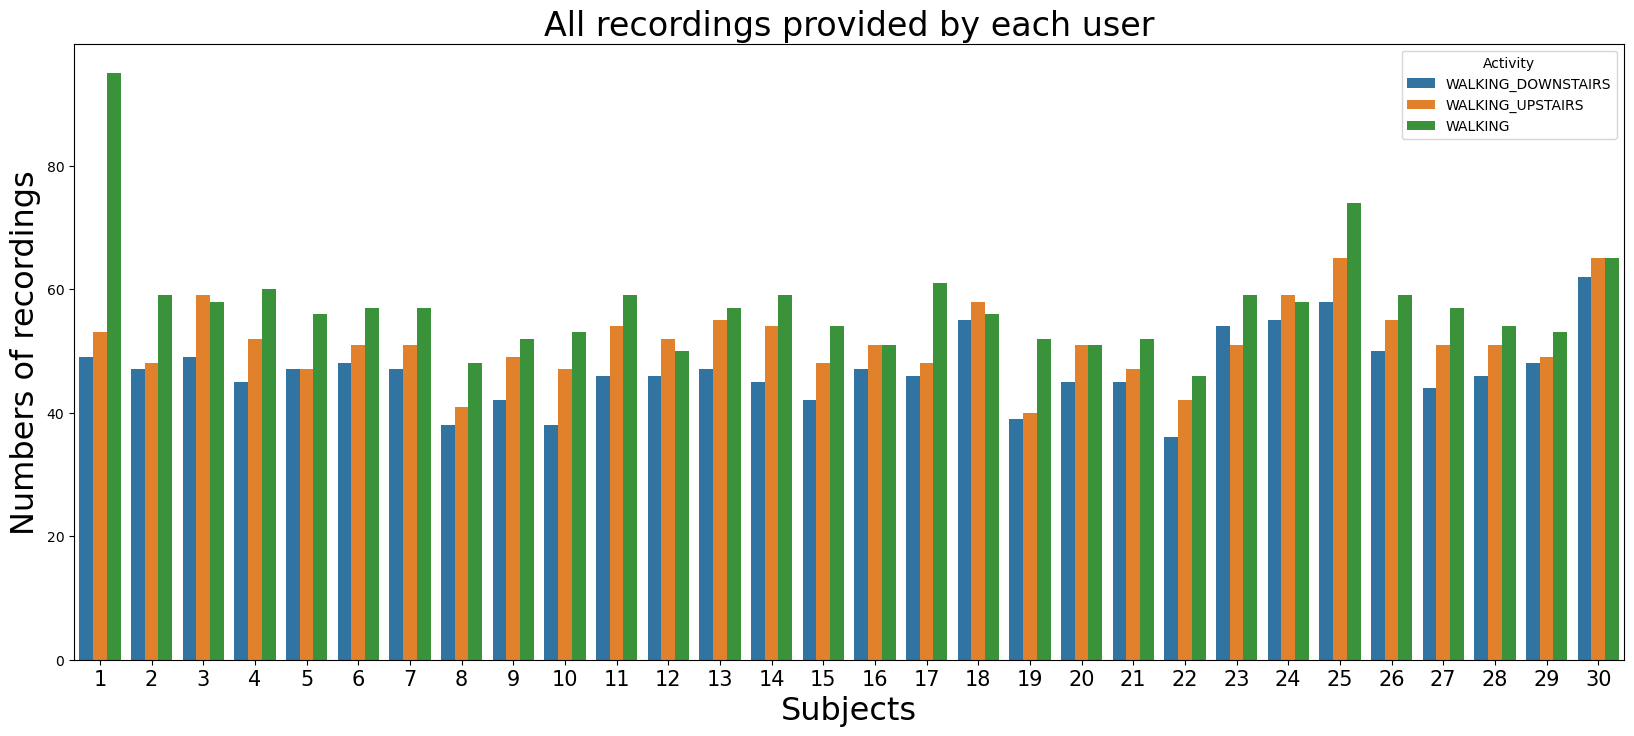

In [93]:
plt.figure(figsize=(20,8))
sns.color_palette("tab10")
plt.title('All recordings provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = full_data)
plt.xlabel("Subjects", size=23)
plt.ylabel("Numbers of recordings", size=23)
plt.xticks(size=15)
plt.show()

In [94]:
# Data type of the columns and no of nulls
print("No. of nulls: {}".format(full_data.isna().sum().sum()))

No. of nulls: 0


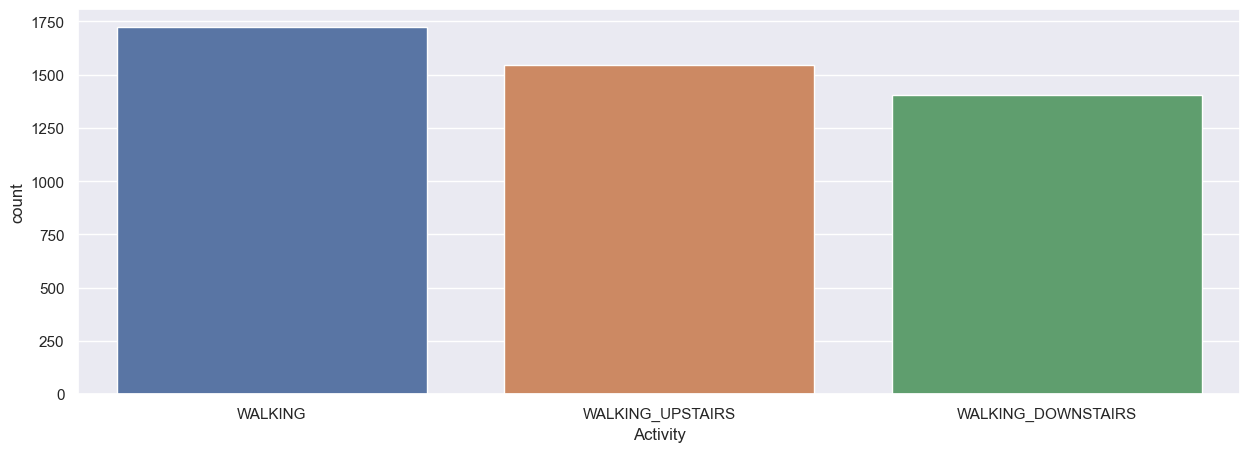

In [95]:
# Our main aim is to categorize an activity in to one of the six we have, 
# so let's take a look on how the label is distributed.
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

In [96]:
# Create label
full_data_copy = full_data.copy()
label = full_data_copy.pop('Activity')

label

0       WALKING_DOWNSTAIRS
1       WALKING_DOWNSTAIRS
2       WALKING_DOWNSTAIRS
3       WALKING_DOWNSTAIRS
4       WALKING_DOWNSTAIRS
               ...        
4667               WALKING
4668               WALKING
4669               WALKING
4670               WALKING
4671               WALKING
Name: Activity, Length: 4672, dtype: object

In [97]:
# Create datasets
tsne_data = full_data_copy.copy()
# tsne_data.pop('Data') to see & differentiate train or test data
tsne_data.pop('subject')
tsne_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-max(),tBodyAccMag-min(),tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.081378,-0.838651,-0.170441,-0.625680,-0.381499,0.837681,-0.107066,0.140391,-0.197803,0.092894
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.115007,-0.760780,-0.048826,-0.520178,-0.407414,0.883091,0.013206,-0.023493,0.192061,-0.294407
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.083262,-0.760780,-0.088541,-0.535671,-0.357024,0.832097,-0.035541,0.028456,0.253043,-0.456471
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,0.013803,-0.658212,-0.098690,-0.528973,-0.347359,0.817454,-0.122338,0.049862,0.260749,-0.340073
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,0.092723,-0.590217,0.028422,-0.380792,-0.235214,0.853343,-0.125335,-0.021217,0.240181,-0.058654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,-0.362568,-0.638740,-0.300780,-0.760597,-0.639880,0.682496,-0.169589,0.159046,-0.123930,0.016433
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.194542,-0.638740,-0.328001,-0.770301,-0.663009,0.699429,-0.083903,0.129510,-0.170542,0.030205
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.194542,-0.812228,-0.412215,-0.815688,-0.676418,0.631963,-0.117568,0.132474,-0.109778,-0.003312
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.424891,-0.812228,-0.402012,-0.812115,-0.678058,0.692574,-0.122038,0.043825,0.055390,-0.005972


In [98]:
# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [99]:
codes = label.astype('category').cat.codes
n_classes = np.unique(codes).size
label_counts = label.value_counts()
label_counts
n_classes

3

In [100]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, 
                random_state=17)
kmeans.fit(tsne_data)
cluster_labels = kmeans.labels_

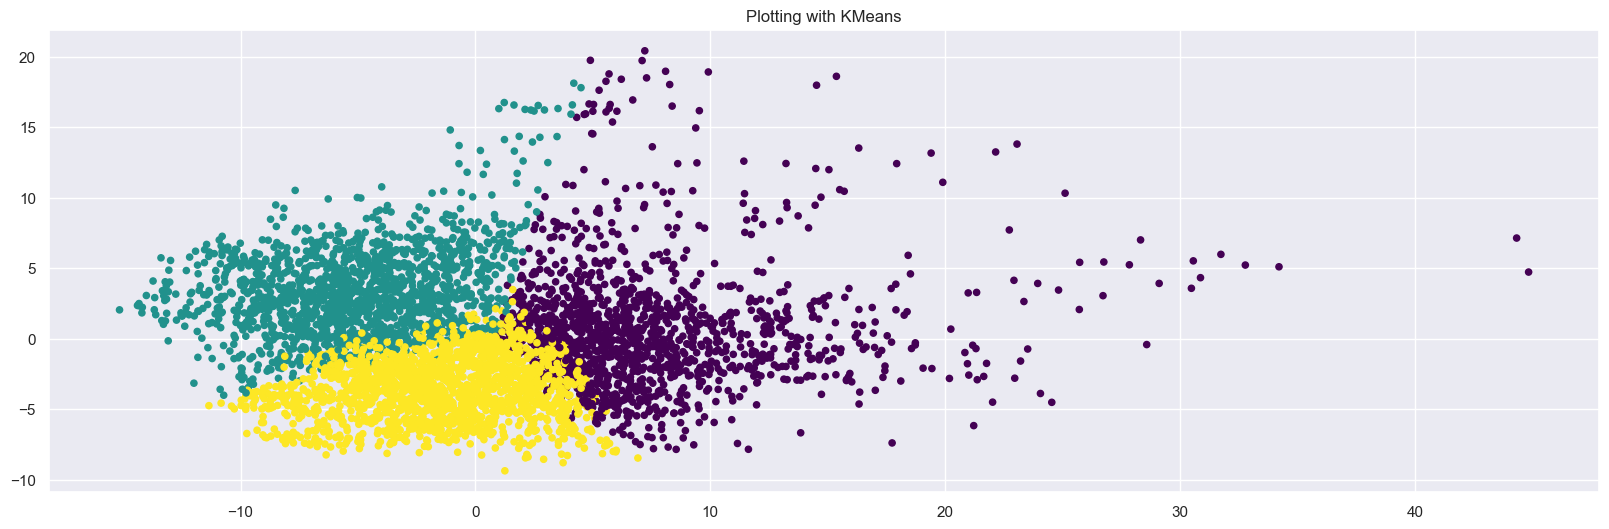

In [101]:
plt.figure(figsize=(20,6))
plt.title("Plotting with KMeans")
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, s=20,  
            cmap='viridis')

In [102]:
tab = pd.crosstab(codes, cluster_labels, margins=True)
tab.index = ['walking','going up the stairs',
            'going down the stairs', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(3)] + ['all']
tab

,cluster1,cluster2,cluster3,all
walking,307,109,1306,1722
going up the stairs,885,215,306,1406
going down the stairs,205,1233,106,1544
all,1397,1557,1718,4672


In [103]:
# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


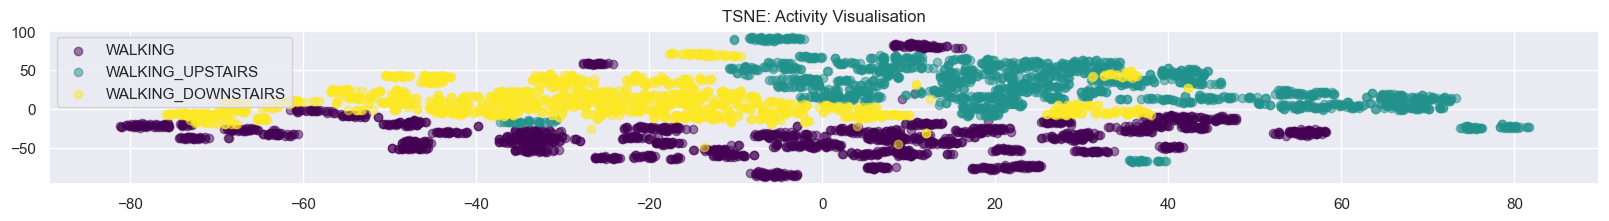

In [104]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
plt.figure(figsize=(20,2))
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()


In [105]:
full_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccMag-sma(),tBodyAccMag-energy(),tBodyAccMag-iqr(),tBodyAccMag-entropy(),tBodyAccMag-arCoeff()1,tBodyAccMag-arCoeff()2,tBodyAccMag-arCoeff()3,tBodyAccMag-arCoeff()4,subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.170441,-0.625680,-0.381499,0.837681,-0.107066,0.140391,-0.197803,0.092894,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.048826,-0.520178,-0.407414,0.883091,0.013206,-0.023493,0.192061,-0.294407,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.088541,-0.535671,-0.357024,0.832097,-0.035541,0.028456,0.253043,-0.456471,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.098690,-0.528973,-0.347359,0.817454,-0.122338,0.049862,0.260749,-0.340073,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,0.028422,-0.380792,-0.235214,0.853343,-0.125335,-0.021217,0.240181,-0.058654,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,-0.300780,-0.760597,-0.639880,0.682496,-0.169589,0.159046,-0.123930,0.016433,24,WALKING
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.328001,-0.770301,-0.663009,0.699429,-0.083903,0.129510,-0.170542,0.030205,24,WALKING
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.412215,-0.815688,-0.676418,0.631963,-0.117568,0.132474,-0.109778,-0.003312,24,WALKING
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.402012,-0.812115,-0.678058,0.692574,-0.122038,0.043825,0.055390,-0.005972,24,WALKING


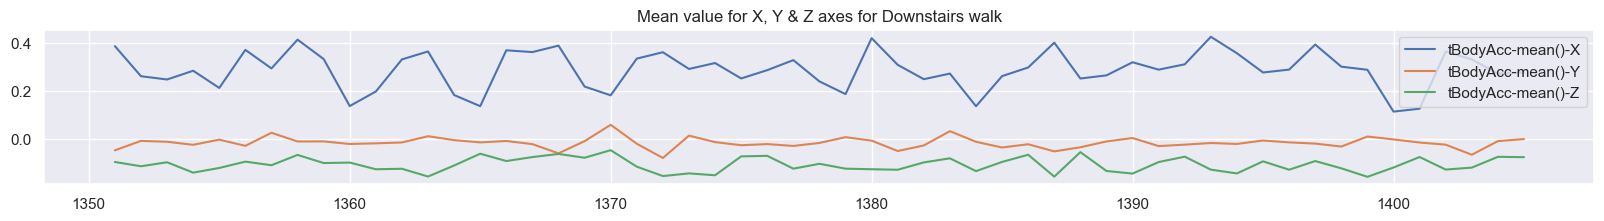

In [106]:
plt.figure(figsize=(20,2))
is_sub_24_DOWN = full_data_DOWN['subject'] == 24
X_full_DOWN = full_data_DOWN["tBodyAcc-mean()-X"]
Y_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Y"]
Z_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Z"]
X_DOWN = X_full_DOWN[is_sub_24_DOWN]
Y_DOWN = Y_full_DOWN[is_sub_24_DOWN]
Z_DOWN = Z_full_DOWN[is_sub_24_DOWN]

plt.plot(X_DOWN, label='tBodyAcc-mean()-X')
plt.plot(Y_DOWN, label='tBodyAcc-mean()-Y')
plt.plot(Z_DOWN, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Downstairs walk')
plt.legend()
plt.show()

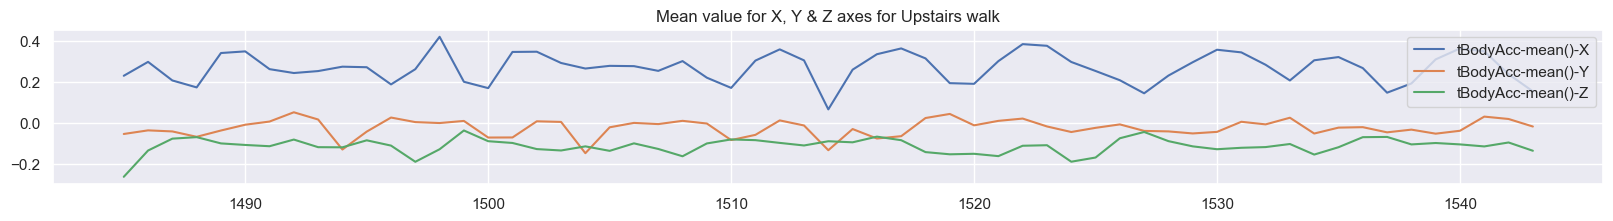

In [107]:
plt.figure(figsize=(20,2))
is_sub_24_UP = full_data_UP['subject'] == 24
X_full_UP = full_data_UP["tBodyAcc-mean()-X"]
Y_full_UP = full_data_UP["tBodyAcc-mean()-Y"]
Z_full_UP = full_data_UP["tBodyAcc-mean()-Z"]
X_UP = X_full_UP[is_sub_24_UP]
Y_UP = Y_full_UP[is_sub_24_UP]
Z_UP = Z_full_UP[is_sub_24_UP]

plt.plot(X_UP, label='tBodyAcc-mean()-X')
plt.plot(Y_UP, label='tBodyAcc-mean()-Y')
plt.plot(Z_UP, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

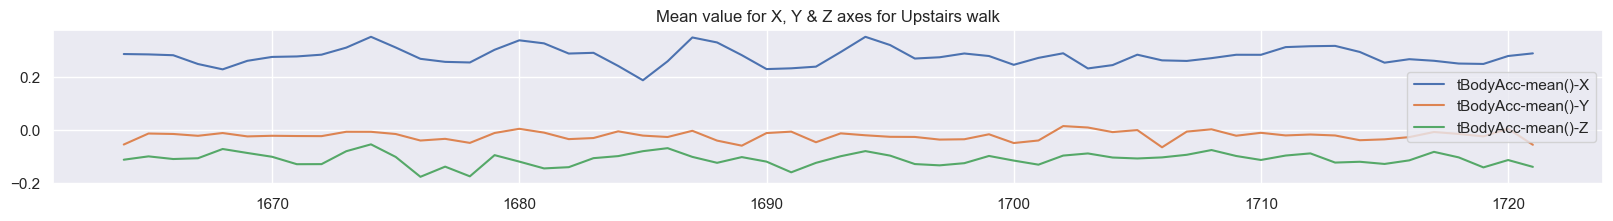

In [108]:
plt.figure(figsize=(20,2))
is_sub_24_WALKING = full_data_WALKING['subject'] == 24
X_full_WALKING = full_data_WALKING["tBodyAcc-mean()-X"]
Y_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Y"]
Z_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Z"]
X_WALKING = X_full_WALKING[is_sub_24_WALKING]
Y_WALKING = Y_full_WALKING[is_sub_24_WALKING]
Z_WALKING = Z_full_WALKING[is_sub_24_WALKING]

plt.plot(X_WALKING, label='tBodyAcc-mean()-X')
plt.plot(Y_WALKING, label='tBodyAcc-mean()-Y')
plt.plot(Z_WALKING, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 90.58823529411765
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 90.58823529411765
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 90.58823529411765


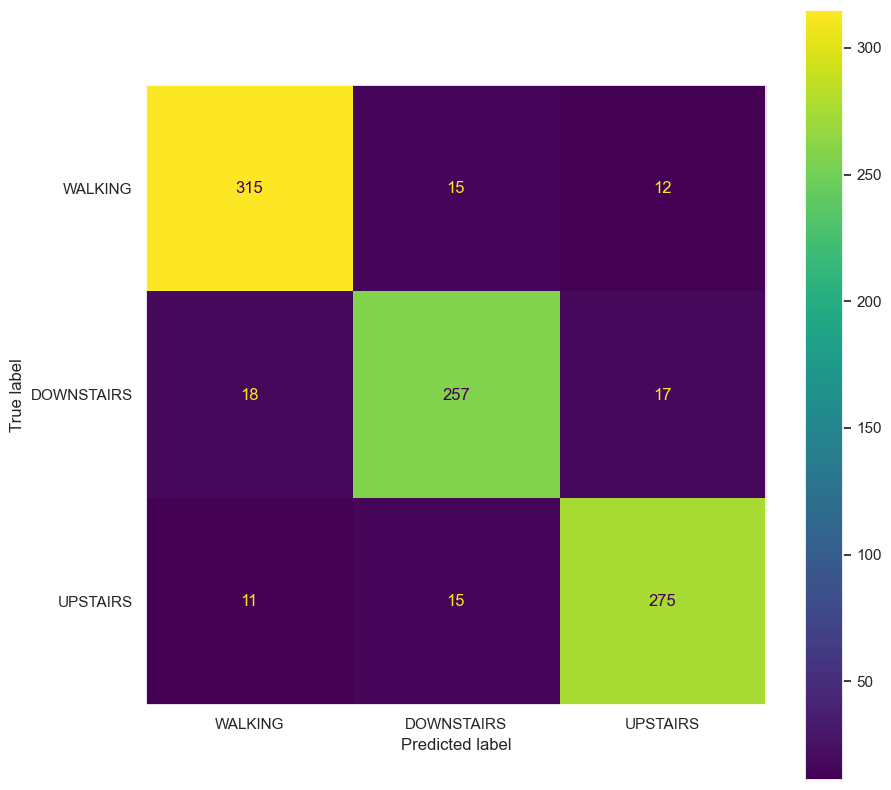

In [110]:
# Decision Tree
# https://www.kaggle.com/code/essammohamed4320/human-activity-recognition-scientific-prespective?scriptVersionId=107355415&cellId=41
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = full_data.drop(['subject', 'Activity'], axis=1)
y = full_data['Activity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)